# Election Visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
election = pd.read_csv("../Data/election_2022.csv")
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [3]:
election.tail()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007
247,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [4]:
# Check basic statistics

election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [5]:
# Check column names

election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [6]:
# Check dimensions
election.shape

(248, 7)

In [7]:
# Check data types by column
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [8]:
# Check for NaN
election.isnull().sum()

광역시도    0
시군구     0
선거인수    0
투표수     0
이재명     0
윤석열     0
심상정     0
dtype: int64

> DataSet에는 Nan이 없음

In [9]:
# electionSum = Yoon Suk-yeol + Lee Jae-myung + Sim Sang-jung

election['electionSum'] = election[['윤석열', '이재명','심상정']].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [10]:
# What percentage is electionSum of the total votes?

election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100, 2)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [11]:
# Save as CSV: election_2022_job.csv

election.to_csv("../Data/election_2022_job.csv", index=False)

In [12]:
# OS information
import platform

# font_manager: Font management module
# rc: Font change module
from matplotlib import font_manager, rc

# Unicode settings
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [13]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [14]:
# Use pivot to aggregate and group by total votes by metropolitan city and province
elec_sum = election.pivot_table('투표수', index='광역시도', aggfunc=sum)
elec_sum.head()

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492


In [15]:
# Sort by total votes in descending order

elec_sum_order = elec_sum.sort_values(by='투표수', ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


In [16]:
# What percentage of the total voting population is in the metropolitan area 
#(Gyeonggi, Seoul, Incheon)?
round(elec_sum_order['투표수'][[0,1,4]].sum() / \
elec_sum_order['투표수'].sum() * 100, 2)

50.06

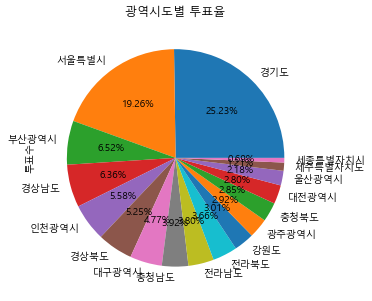

In [17]:
elec_sum_order['투표수'].plot(kind='pie',
                          figsize=(7,5),
                           autopct='%.2f%%'
                          )
plt.title('광역시도별 투표율')
plt.show()

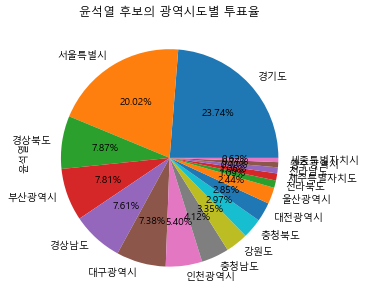

In [18]:
# Yoon Suk-yeol's vote percentage by metropolitan city and province
elec_윤석열 = election.pivot_table('윤석열', index='광역시도', aggfunc=sum)
elec_윤석열 = elec_윤석열.sort_values(by='윤석열', ascending=False)

elec_윤석열['윤석열'].plot(kind='pie',
                          figsize=(7,5),
                           autopct='%.2f%%'
                          )
plt.title('윤석열 후보의 광역시도별 투표율')
plt.show()

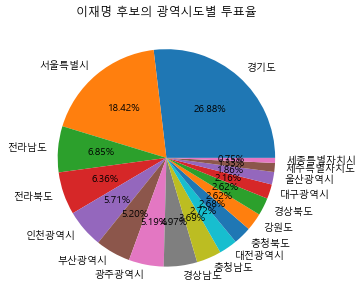

In [19]:
# Lee Jae-myung's vote percentage by metropolitan city and province

elec_이재명 = election.pivot_table('이재명', index='광역시도', aggfunc=sum)
elec_이재명 = elec_이재명.sort_values(by='이재명', ascending=False)

elec_이재명['이재명'].plot(kind='pie',
                          figsize=(7,5),
                           autopct='%.2f%%'
                          )
plt.title('이재명 후보의 광역시도별 투표율')
plt.ylabel(' ')
plt.show()

# Find the Five regions with the highest number of votes

In [20]:
election_seoul = election[election['광역시도']=='서울특별시']
election_seoul_윤석열 = election_seoul.sort_values(by='윤석열', ascending=False)
election_seoul_윤석열 = election_seoul_윤석열[['시군구','윤석열']]
election_seoul_윤석열.head(10)

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340
24,강동구,160593
20,관악구,151944
14,양천구,149780
11,은평구,140666
19,동작구,135733


In [21]:
election_seoul_윤석열_label = \
    election_seoul_윤석열[0:5]['시군구'].append(pd.Series('기타')).reset_index(drop=True)

election_seoul_윤석열_label

0    송파구
1    강남구
2    강서구
3    서초구
4    노원구
5     기타
dtype: object

In [22]:
election_seoul_윤석열_data = \
    election_seoul_윤석열[0:5]['윤석열'].\
    append(pd.Series(sum(election_seoul_윤석열[5:]['윤석열']))).reset_index(drop=True)

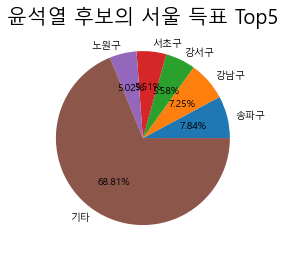

In [23]:
data = election_seoul_윤석열_data
categories = election_seoul_윤석열_label

plt.pie(data,
        labels=categories,
        autopct="%.2f%%"
       )
plt.title("윤석열 후보의 서울 득표 Top5", fontsize=20)
plt.show()

# Find the number of votes in the candidate's birth region

In [24]:
# 윤석열 후보 : 출생지는 성북구
pob_윤석열 = election[election['시군구']=='성북구']
pob_윤석열

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [25]:
pob_윤석열_data = \
    pd.Series([int(pob_윤석열['윤석열']), int(pob_윤석열['이재명']),\
           int(pob_윤석열['심상정'])]).append(pob_윤석열['투표수'] - \
                                        pob_윤석열['electionSum']).reset_index(drop=True)

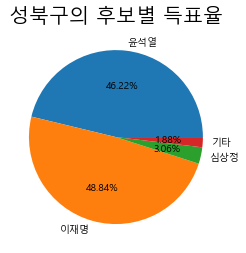

In [26]:
data = pob_윤석열_data
categories = ['윤석열','이재명','심상정','기타']

plt.pie(data,
        labels=categories,
        autopct="%.2f%%"
       )
plt.title("성북구의 후보별 득표율", fontsize=20)
plt.show()

# 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현

In [27]:
# Find the four regions with the highest number of votes

top4Area = list(elec_sum_order.index[0:4])
top4Area

['경기도', '서울특별시', '부산광역시', '경상남도']

In [28]:
# Sum of Yoon Suk-yeol's votes by metropolitan city and province
elec_윤석열 = election.pivot_table('윤석열', index='광역시도', aggfunc=sum)
elec_윤석열.head()

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511


In [29]:
# Sum of Lee Jae-myung's votes by metropolitan city and province
elec_이재명 = election.pivot_table('이재명', index='광역시도', aggfunc=sum)
elec_이재명.head()

,이재명
광역시도,
강원도,419644
경기도,4297931
경상남도,794130
경상북도,418371
광주광역시,830058


In [30]:
# Sum of Sim Sang-jung's votes by metropolitan city and province
elec_심상정 = election.pivot_table('심상정', index='광역시도', aggfunc=sum)
elec_심상정.head()

,심상정
광역시도,
강원도,25031
경기도,201113
경상남도,52591
경상북도,33123
광주광역시,14865


In [31]:
# Find the number of votes in the region with the highest votes
top4_1 = pd.Series(int(elec_윤석열[elec_윤석열.index == top4Area[0]]['윤석열']))
top4_1 = top4_1.append(\
      pd.Series(int(elec_이재명[elec_이재명.index == top4Area[0]]['이재명'])))
top4_1 = top4_1.append(\
      pd.Series(int(elec_심상정[elec_심상정.index == top4Area[0]]['심상정'])))
top4_1.reset_index(drop=True)

0    3859666
1    4297931
2     201113
dtype: int64

In [32]:
# Find the number of votes in the region with the second highest votes
top4_2 = pd.Series(int(elec_윤석열[elec_윤석열.index == top4Area[1]]['윤석열']))
top4_2 = top4_2.append(\
      pd.Series(int(elec_이재명[elec_이재명.index == top4Area[1]]['이재명'])))
top4_2 = top4_2.append(\
      pd.Series(int(elec_심상정[elec_심상정.index == top4Area[1]]['심상정'])))
top4_2.reset_index(drop=True)

0    3255747
1    2944981
2     180324
dtype: int64

In [33]:
# Find the number of votes in the region with the third highest votes
top4_3 = pd.Series(int(elec_윤석열[elec_윤석열.index == top4Area[2]]['윤석열']))
top4_3 = top4_3.append(\
      pd.Series(int(elec_이재명[elec_이재명.index == top4Area[2]]['이재명'])))
top4_3 = top4_3.append(\
      pd.Series(int(elec_심상정[elec_심상정.index == top4Area[2]]['심상정'])))
top4_3.reset_index(drop=True)

0    1270072
1     831896
2      47541
dtype: int64

In [34]:
# Find the number of votes in the region with the fourth highest votes
top4_4 = pd.Series(int(elec_윤석열[elec_윤석열.index == top4Area[3]]['윤석열']))
top4_4 = top4_4.append(\
      pd.Series(int(elec_이재명[elec_이재명.index == top4Area[3]]['이재명'])))
top4_4 = top4_4.append(\
      pd.Series(int(elec_심상정[elec_심상정.index == top4Area[3]]['심상정'])))
top4_4.reset_index(drop=True)

0    1237346
1     794130
2      52591
dtype: int64

In [35]:
# Convert to dataFrame
data = {top4Area[0] : list(top4_1),
        top4Area[1] : list(top4_2),
        top4Area[2] : list(top4_3),
        top4Area[3] : list(top4_4),
       }
top4 = pd.DataFrame(data, index=['윤석열','이재명','심상정'])
top4

,경기도,서울특별시,부산광역시,경상남도
윤석열,3859666,3255747,1270072,1237346
이재명,4297931,2944981,831896,794130
심상정,201113,180324,47541,52591


In [36]:
top4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 윤석열 to 심상정
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   경기도     3 non-null      int64
 1   서울특별시   3 non-null      int64
 2   부산광역시   3 non-null      int64
 3   경상남도    3 non-null      int64
dtypes: int64(4)
memory usage: 120.0+ bytes


In [37]:
top5 = top4 / 1000
top5

,경기도,서울특별시,부산광역시,경상남도
윤석열,3859.666,3255.747,1270.072,1237.346
이재명,4297.931,2944.981,831.896,794.130
심상정,201.113,180.324,47.541,52.591


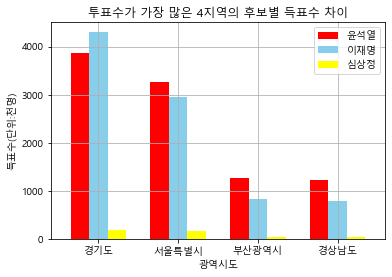

In [38]:
top5.T.plot.bar(rot=0,
                width=0.7,
                color=['red','#87CEEB','yellow']
               )
plt.grid()
plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이')
plt.xlabel('광역시도')
plt.ylabel('득표수(단위:천명)')
plt.show()

In [40]:
top5.T

,윤석열,이재명,심상정
경기도,3859.666,4297.931,201.113
서울특별시,3255.747,2944.981,180.324
부산광역시,1270.072,831.896,47.541
경상남도,1237.346,794.130,52.591


In [54]:
# Candidate votes in the top 5 regions by number of votes

elec_top5 = \
    election.sort_values(by='투표수', ascending=False)[0:5]\
    [['윤석열','이재명','심상정']]
elec_top5

,윤석열,이재명,심상정
100,236055,283324,12955
85,224331,285227,13249
98,203075,239179,10089
23,255166,180490,10652
15,181510,190000,11100


In [60]:
# Create index
city = \
    election.sort_values(by='투표수', ascending=False)[0:5]['광역시도'] + " " + \
    election.sort_values(by='투표수', ascending=False)[0:5]['시군구']
city

100      경기도 화성시
85       경기도 부천시
98      경기도 남양주시
23     서울특별시 송파구
15     서울특별시 강서구
dtype: object

In [61]:
elec_top5.index = city
elec_top5

,윤석열,이재명,심상정
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


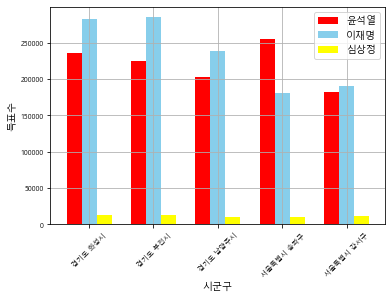

In [72]:
elec_top5.plot.bar(width=0.7,
                   color=['red','#87CEEB','yellow'],
                   rot = 45,
                   fontsize=7
)
plt.grid()
plt.xlabel('시군구')
plt.ylabel('득표수')

plt.show()